# Getting Started with Images
This notebook will help you take your first steps in learning Image Processing and Computer Vision using OpenCV. You will learn some important lessons using some simple examples. In this notebook, you will learn the following:

1. Reading an image
2. Check image attributes like datatype and shape
3. Matrix representation of an image in Numpy
4. Color Images and splitting/merging image channels
5. Displaying images using matplotlib
6. Saving images

## Install libraries

**IMPORTANT!!!** Make sure you are using the correct environment on your notebook and have installed the opencv library.
You can do this in anaconda with the following commands.
1. To create the virtual environment:
    conda create --name opencv-env 
2. To activate the virtual environment:
    conda activate opencv-env 
3. To install the opencv library:
    conda install -c conda-forge opencv

Then we need to install the libraries with the following command:

In [20]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import the libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

#this inline specification is to display directly images in the notebook
%matplotlib inline 

## Display Image Directly
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [2]:
# Display 18x18 pixel image.
Image(filename="datos/GettingStartedWithImages/logo_18x18.png")

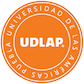

In [3]:
# Display 84x84 pixel image.
Image(filename="datos/GettingStartedWithImages/logo_84x84.png")

## Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

**Function Syntax**

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.

2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### OpenCV Documentation

1. **`Imread`**:  <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56" target="_blank">Documentation link</a>

2. **`ImreadModes`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80" target="_blank">Documentation link</a>

## Read image in grayscale

In [4]:
# Read image as gray scale.
cb_img = cv2.imread("datos/GettingStartedWithImages/logo_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/GettingStartedWithImages/logo_18x18.png")

[[255 255 255 255 255 245 224 208 201 201 209 224 246 255 255 255 255 255]
 [255 255 255 252 216 184 176 175 169 175 176 173 182 217 252 255 255 255]
 [255 255 248 195 173 180 186 183 182 184 184 184 180 176 197 249 255 255]
 [255 251 196 174 183 183 182 179 175 174 178 181 186 169 166 201 252 255]
 [255 216 167 177 183 180 167 164 164 164 164 167 180 178 188 172 217 255]
 [245 182 186 181 180 163 166 167 166 166 167 166 164 183 181 183 185 246]
 [224 173 180 184 166 165 165 164 166 166 164 166 164 166 186 170 166 227]
 [207 171 185 178 164 167 167 170 164 166 166 165 168 163 179 179 167 209]
 [200 160 176 173 207 212 224 221 224 178 227 209 233 202 168 186 173 201]
 [198 182 186 167 212 228 221 221 225 212 231 225 226 189 172 185 178 201]
 [207 167 181 177 166 173 168 173 166 177 166 170 166 164 179 182 173 209]
 [224 171 186 184 164 164 164 164 165 163 164 164 165 166 185 169 165 226]
 [244 184 184 183 180 164 166 167 166 167 167 166 163 181 179 186 183 246]
 [255 214 173 183 183 180

In a grayscale image, each pixel’s value represents its light intensity or luminosity. This value is derived from the original image’s color channels (red, green, and blue) using a formula that accounts for how the human eye perceives brightness.
- In the given image we can see that the white areas have greater values than the orange areas

In this case, the resulting array has the same dimensions as the image.

## Read Image in Color


In [5]:
# Read image in color.
cb_img = cv2.imread("datos/GettingStartedWithImages/logo_18x18.png", 1)

# print the first pixel of the image thats why we use [0,0]
print(cb_img[0,0])
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/GettingStartedWithImages/logo_18x18.png")

[255 255 255]
(18, 18, 3)


With the IMREAD_COLOR flag, we can see that the resulting NumPy array is three times larger than the grayscale array because it includes RGB values.

## Read Image in color with alpha channel


In [6]:
# Read image in color.
cb_img = cv2.imread("datos/GettingStartedWithImages/dices_18x18.png", -1)

# print the first pixel of the image thats why we use [0,0]
print(cb_img[0,0])
# print shape of the numpy array
print(cb_img.shape)
Image(filename="datos/GettingStartedWithImages/dices_18x18.png")

[0 0 0 0]
(18, 18, 4)


With the IMREAD_UNCHANGED we can see that the NumPy array has another dimension, the alpha channel.

## Display Image attributes

With .shape and .dtype attributes we can see the shape and type of the image.

In [7]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18, 4)
Data type of image is: uint8


## Display Images in grayscale with Matplotlib

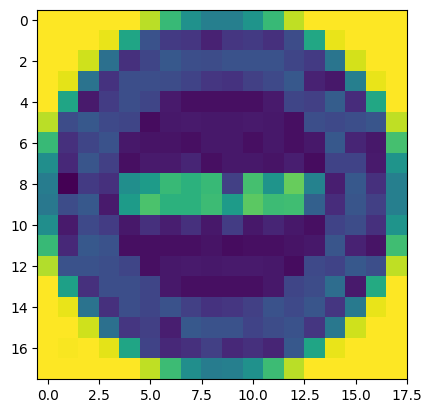

In [8]:
# Read image as gray scale.
cb_img_for_plt = cv2.imread("datos/GettingStartedWithImages/logo_18x18.png", 0)
# Display image.
plt.imshow(cb_img_for_plt)

**Why is not in grayscale?**

In this case the imshow method of matplotlib uses different color maps and it's possible that the gray scale color map is not set.

In order to use the gray scale color map we have to set the attribute cmap to "gray"

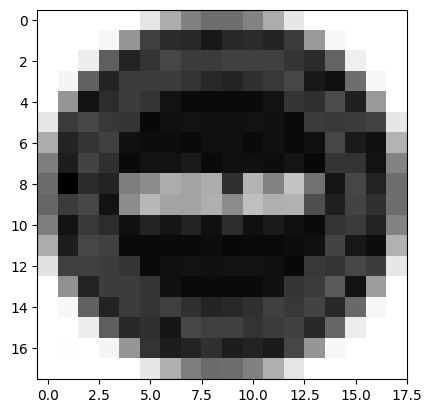

In [9]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img_for_plt, cmap="gray")

### Another Example

[[  0   0   0 255   0   0 255 255 255 255 255 255   0   0 255   0   0   0]
 [  0 255 255   0 255 255 237 231 224 222 227 236 252 255   0 255   0   0]
 [255 255   0 255 251 205 173 178 186 188 187 195 221 237 255   0 255   0]
 [255   0 255 254 176 182 205 181 178 187 190 191 194 203 233 255   0 255]
 [  0 255 255 179 188 249 255 233 173 178 182 182 190 199 205 238 255   0]
 [  0 255 214 160 206 255 255 255 202 215 214 210 216 195 196 225 255   0]
 [255 253 171 167 175 240 255 219 206 212 211 212 235 184 195 203 238   0]
 [255 243 163 169 141 175 175 153 220 220 218 231 242 219 241 224 226 255]
 [255 235 161 133 110 102 194 187 215 220 227 217 224 232 242 223 225 255]
 [255 236 139 112 112  99 243 229 190 210 208 208 214 210 232 210 229 255]
 [255 249 119 115 114 102 231 249 188 202 199 207 214 220 214 210 235 255]
 [255 255 141 110 115 109 239 255 195 160 170 172 185 187 186 196 247   0]
 [  0 255 230 127 107 171 255 255 232 167 172 180 190 192 182 231 255   0]
 [  0 252 255 248 235 253

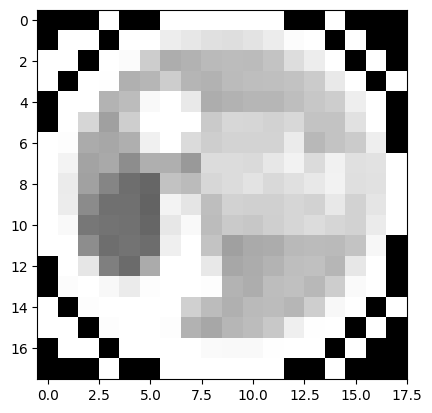

In [10]:
# Read image as gray scale.
cb_img_for_plt_other = cv2.imread("datos/GettingStartedWithImages/logotwo_18x18.png", 0)
# Display image.
plt.imshow(cb_img_for_plt_other, cmap="gray")
print(cb_img_for_plt_other)
Image(filename="datos/GettingStartedWithImages/logotwo_18x18.png")

## Display Images in color with Matplotlib

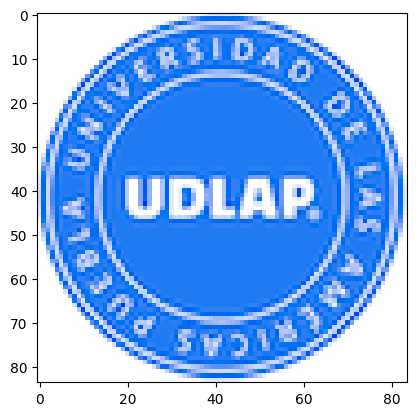

In [11]:
# Read image as gray scale.
cb_img_for_plt_color = cv2.imread("datos/GettingStartedWithImages/logo_84x84.png", -1)
# Display image.
plt.imshow(cb_img_for_plt_color)

**Why do the colors not correspond to the ones in the image?**

The reason is that OpenCV stores image in BGR format and the matplotlib library expects the image in RGB format.

In order to display correctly the image we have to reverse the channels in the correct way.

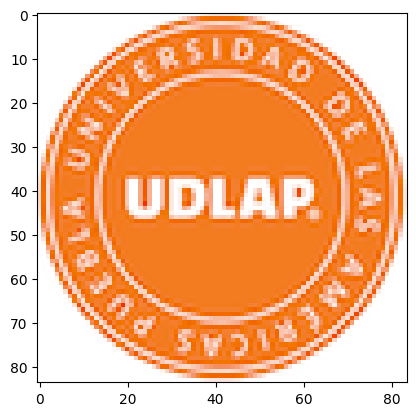

In [12]:
b, g, r, a = cv2.split(cb_img_for_plt_color)
cb_img_for_plt_color_reversed = cv2.merge((r, g, b))
cb_img_for_plt_color_reversed = cv2.merge((r, g, b, a))

plt.imshow(cb_img_for_plt_color_reversed)

## Splitting and merging color channels

**cv2.split()** Divides a multi-channel array into several single-channel arrays.

**cv2.merge()** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### OpenCV Documentation

<a href="https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a" target="_blank">Documentation link</a>

### Example

Text(0.5, 1.0, 'Merged Output')

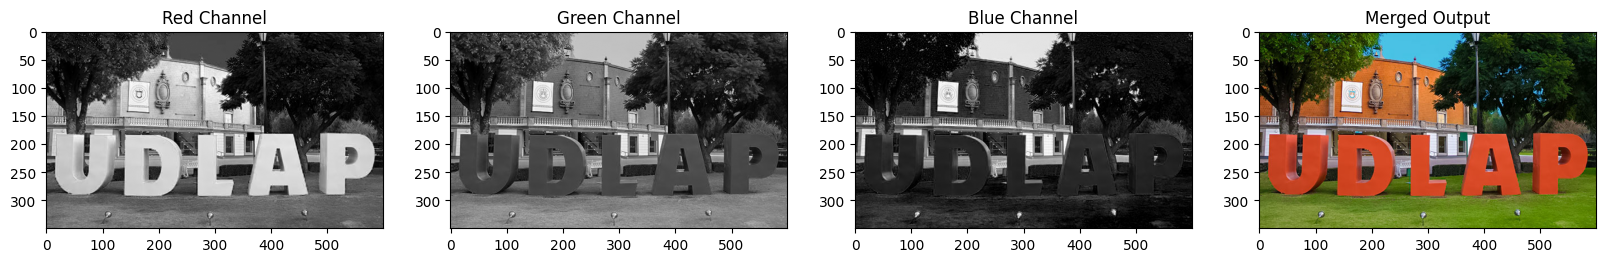

In [13]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("datos/GettingStartedWithImages/udlap.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a RGB image
imgMerged = cv2.merge((r, g, b))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged)
plt.title("Merged Output")

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

**Function Syntax**

``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.

2. `code` color space conversion code.

### Most common conversion codes

There are a lot of conversion codes but the principal are:
``` python
cv2.COLOR_BGR2RGB
``` 
Converts an image from BGR to RGB.
``` python
cv2.COLOR_BGR2GRAY
``` 
Converts an image from BGR to grayscale.
``` python
cv2.COLOR_BGR2HSV
```
Converts an image from BGR to HSV.
``` python
cv2.COLOR_BGR2LAB
```
Converts an image from BGR to LAB.
``` python
cv2.COLOR_RGB2BGR
```
Converts an image from RGB to BGR

### OpenCV Documentation

1. **`cv2.cvtColor`**: <a href="https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab" target="_blank">Documentation link</a>  

2. **`ColorConversionCodes`**: <a href="https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0" target="_blank">Documentation link</a>

### Convert from BGR to RGB

To do this we use the code cv2.COLOR_BGR2RGB explained before

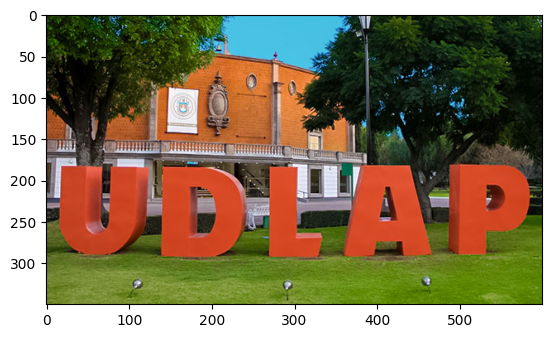

In [14]:
# Change color space BGR to RGB
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

### Changing to HSV color space

The HSV color space represents colors using three components:

Hue: The color type, measured in degrees (0°–360°).

Saturation: The color's purity, ranging from 0 (gray) to 255 (fully saturated).

Value: The brightness, ranging from 0 (dark) to 255 (brightest).

The HSV color space is important because it separates color (Hue) from brightness (Value) and saturation (Saturation), making it ideal for tasks like color segmentation.

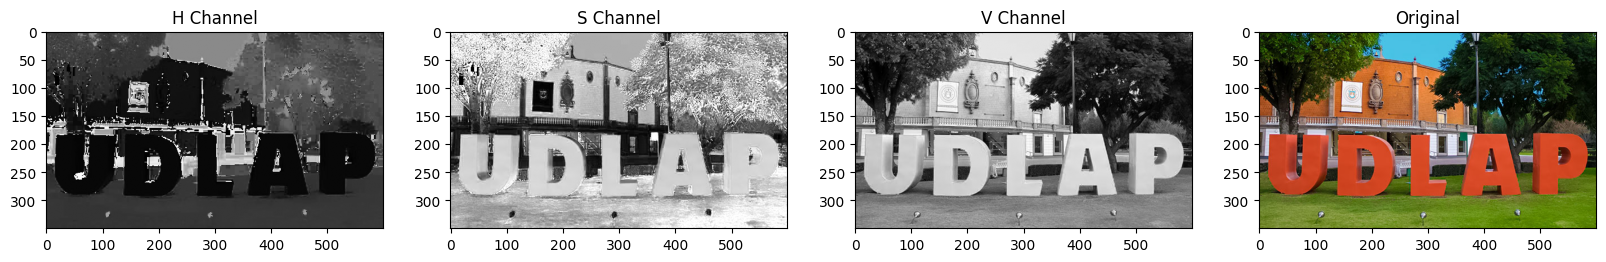

In [15]:
# We use the COLOR_BGR2HSV code to convert the image from BGR to HSV color space
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

## Modifying Individual Channels

We can individually adjust the hue, saturation, and value to achieve the desired color effects.

Since Matplotlib uses the RGB color format, after processing the image in HSV space, it must be converted back to RGB. This conversion can be performed using OpenCV's cvtColor function.

For the following example, we decided to modify the saturation value.

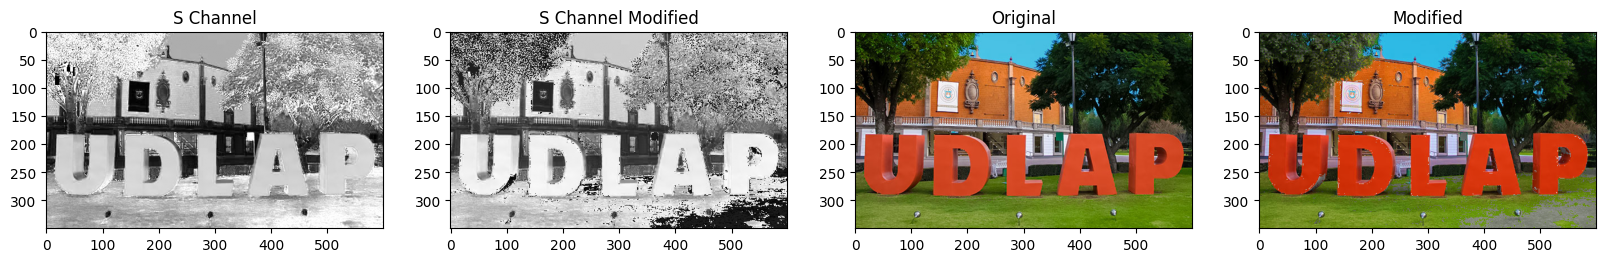

In [16]:
s_new  = s + 30
img_hsv_merged = cv2.merge((h, s_new, v))
img_rgb_smodified = cv2.cvtColor(img_hsv_merged, cv2.COLOR_HSV2RGB)

# Plot modified channels and images
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(142);plt.imshow(s_new, cmap="gray");plt.title("S Channel Modified");
plt.subplot(143);plt.imshow(img_NZ_rgb);plt.title("Original");
plt.subplot(144);plt.imshow(img_rgb_smodified);plt.title("Modified");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).


**Function Syntax**

``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path.

2. `img`: Image or Images to be saved.

### OpenCV Documentation

1. **`Imwrite`**: <a href="https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce" target="_blank">Documentation link</a>

2. **`ImwriteFlags`**: <a href="https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac" target="_blank">Documentation link</a>

### Example

In the following example we are going to save the image with the modification in the saturation value.

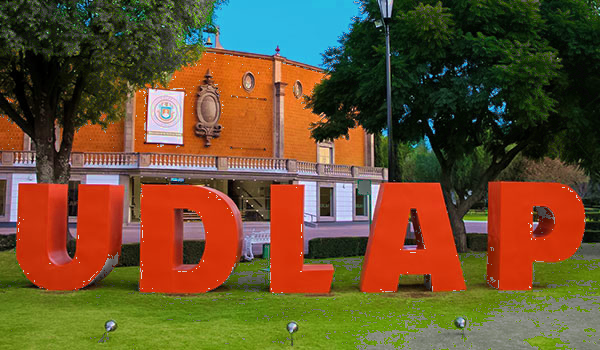

In [17]:
# save the image
img_bgr_smodified = cv2.cvtColor(img_rgb_smodified, cv2.COLOR_RGB2BGR)
cv2.imwrite("datos/GettingStartedWithImages/Saved/UDLAP_saturation_Modified.png", img_bgr_smodified)

Image(filename='datos/GettingStartedWithImages/Saved/UDLAP_saturation_Modified.png')

## Differences Between cv2.imshow and matplotlib.pyplot.imshow

In [18]:
logo_img = cv2.imread("datos/GettingStartedWithImages/logo_84x84.png", 1)
logo_img_rgb = cv2.cvtColor(logo_img, cv2.COLOR_BGR2RGB)

### matplotlib

Text(0.5, 1.0, 'matplotlib imshow')

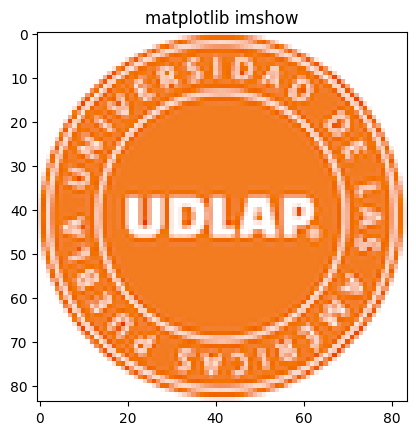

In [19]:
plt.imshow(logo_img_rgb)
plt.title("matplotlib imshow")

### OpenCV

The script for displaying images using OpenCV is located in the GettingStartedWithImages.py file. This separation is necessary because displaying images directly in a Jupyter Notebook kernel can cause the kernel to crash. OpenCV's cv2.imshow function creates a standalone window, which is not fully compatible with Jupyter's environment. By running the display code in a separate script, we avoid this issue and ensure smooth execution.

**IMPORTANT: Ensure that the other Python environment has the cv2 library installed. This is necessary for the code to run correctly, as it relies on OpenCV functionality.**

To install the OpenCV library, use the following command in your Python environment:

``` python
pip install numpy opencv-python
```

### Main differences

1. Color Format:
    - Matplotlib: Expects images in RGB format.
    - OpenCV: Expects images in BGR format.

2. Functionality:
    - Matplotlib: Designed for data analysis and visualization. It allows advanced customizations like titles, labels, and subplots.
    - OpenCV: Designed for computer vision applications. It is optimized for real-time image processing and manipulation.

3. Compatibility:
    - OpenCV: Not directly compatible with Jupyter Notebooks because it opens independent windows.
    - Matplotlib: Well-integrated with Jupyter Notebooks and ideal for displaying images inline.